La predicció per l'hora 25 de l'endemà és: 28.51 µg/m³
La predicció per l'hora 26 de l'endemà és: 27.62 µg/m³
La predicció per l'hora 27 de l'endemà és: 26.64 µg/m³
La predicció per l'hora 28 de l'endemà és: 25.56 µg/m³
La predicció per l'hora 29 de l'endemà és: 24.39 µg/m³
La predicció per l'hora 30 de l'endemà és: 23.13 µg/m³
La predicció per l'hora 31 de l'endemà és: 21.77 µg/m³
La predicció per l'hora 32 de l'endemà és: 20.32 µg/m³
La predicció per l'hora 33 de l'endemà és: 18.78 µg/m³
La predicció per l'hora 34 de l'endemà és: 17.14 µg/m³
La predicció per l'hora 35 de l'endemà és: 15.41 µg/m³
La predicció per l'hora 36 de l'endemà és: 13.59 µg/m³
La predicció per l'hora 37 de l'endemà és: 11.67 µg/m³
La predicció per l'hora 38 de l'endemà és: 9.66 µg/m³
La predicció per l'hora 39 de l'endemà és: 7.56 µg/m³
La predicció per l'hora 40 de l'endemà és: 5.37 µg/m³
La predicció per l'hora 41 de l'endemà és: 3.08 µg/m³
La predicció per l'hora 42 de l'endemà és: 0.70 µg/m³
La predicció pe

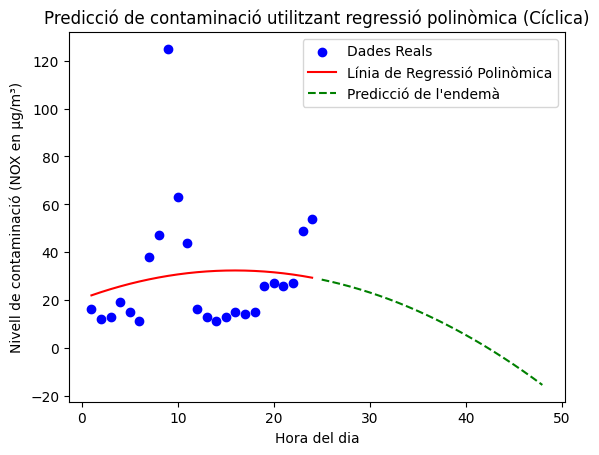

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Dades hardcodejades amb els nivells de NOX proporcionats per a les hores 1 a 24
dades_hardcodejades = {
    "hora": [i for i in range(1, 25)],  # Hores de 1 a 24
    "NOX": [16, 12, 13, 19, 15, 11, 38, 47, 125, 63, 44, 16, 13, 11, 13, 15, 14, 15, 26, 27, 26, 27, 49, 54]  # Nivells de NOX
}

# Convertir les dades en arrays de Numpy per facilitar els càlculs
hores = np.array(dades_hardcodejades["hora"]).reshape(-1, 1)
nox_values = np.array(dades_hardcodejades["NOX"])

# Aplicar la transformació polinòmica (de 2n ordre)
polynomial_features = PolynomialFeatures(degree=2)
hores_polinomiques = polynomial_features.fit_transform(hores)

# Entrenament del model de regressió lineal amb les característiques polinòmiques
model = LinearRegression()
model.fit(hores_polinomiques, nox_values)

# Fer la predicció per a les hores 25 a 48 (l'endemà)
hores_endemà = np.array([i for i in range(25, 49)]).reshape(-1, 1)
hores_endemà_polinomiques = polynomial_features.transform(hores_endemà)
prediccio_resultats_endemà = model.predict(hores_endemà_polinomiques)

# Mostrar la predicció per a l'endemà (hores 25-48)
for hora, prediccio in zip(range(25, 49), prediccio_resultats_endemà):
    print(f"La predicció per l'hora {hora} de l'endemà és: {prediccio:.2f} µg/m³")

# Visualització de les dades, la línia de regressió polinòmica i les prediccions per l'endemà
plt.scatter(hores, nox_values, color='blue', label='Dades Reals')
plt.plot(hores, model.predict(hores_polinomiques), color='red', label='Línia de Regressió Polinòmica')

# Afegir les prediccions de l'endemà
plt.plot(hores_endemà, prediccio_resultats_endemà, color='green', linestyle='dashed', label='Predicció de l\'endemà')

# Etiquetes i títol
plt.xlabel('Hora del dia')
plt.ylabel('Nivell de contaminació (NOX en µg/m³)')
plt.title('Predicció de contaminació utilitzant regressió polinòmica (Cíclica)')
plt.legend()

# Mostrar gràfic
plt.show()


In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Simulació de dades (substitueix per dades reals)
dades = pd.DataFrame({
    'zona': ['A', 'B', 'C', 'D', 'E'],
    'NO2': [80, 120, 90, 150, 110],  # nivells actuals de contaminació (µg/m³)
    'cotxes_diari': [10000, 15000, 12000, 20000, 18000]  # trànsit de cotxes per zona
})

# Definir model de reducció: Suposem que cada 100 busos substitueixen el 10% dels cotxes
factor_reduccio = 0.10  # 10% menys cotxes per cada 100 busos
reduccio_NO2_percotxe = 0.002  # Quantitat de NO2 reduïda per cada cotxe menys

def calcular_impacte_busos(dades, busos_per_zona):
    resultats = []
    
    for i, fila in dades.iterrows():
        zona = fila['zona']
        cotxes_actuals = fila['cotxes_diari']
        no2_actual = fila['NO2']
        
        busos = busos_per_zona.get(zona, 0)  # Nombre de busos a afegir
        cotxes_reduits = (busos // 100) * factor_reduccio * cotxes_actuals
        nova_contaminacio = no2_actual - (cotxes_reduits * reduccio_NO2_percotxe)
        
        resultats.append({'zona': zona, 'NO2_nou': max(nova_contaminacio, 0)})
    
    return pd.DataFrame(resultats)

# Definir quants busos afegim per zona (exemple aleatori)
busos_per_zona = {'A': 100, 'B': 200, 'C': 150, 'D': 300, 'E': 250}

# Calcular el nou nivell de contaminació
resultat_final = calcular_impacte_busos(dades, busos_per_zona)
print(resultat_final)


  zona  NO2_nou
0    A     78.0
1    B    114.0
2    C     87.6
3    D    138.0
4    E    102.8


🌍 Emissions mínimes per contaminant (zones més netes):
{'CO': 215.57, 'H2S': 1.04, 'NO': 1.38, 'NO2': 6.23, 'NOX': 7.99, 'O3': 11.69, 'PM1': 1.65, 'PM10': 5.34, 'PM2.5': 2.38, 'SO2': 1.07}

Procesando el contaminante: CO (emisión mínima: 215.57 µg/m³)
🔇 No hi ha zones contaminades per CO. Saltant...

Procesando el contaminante: H2S (emisión mínima: 1.04 µg/m³)


KeyError: 'num_autobusos'

In [29]:
import pandas as pd

# Carregar les dades des del CSV
data = pd.read_csv('Sortida/prediccions_contaminacio.csv')

# Agrupar les dades per zona i contaminant i calcular la mitjana de contaminació
contaminants_per_zona = data.groupby(['estacio', 'contaminant']).agg({'prediccio': 'mean'}).reset_index()

# Identificar les zones més contaminades per cada contaminant
zones_mes_contaminades = contaminants_per_zona.groupby('estacio').agg({'prediccio': 'sum'}).reset_index()

# Ordenar per les zones amb més contaminació
zones_mes_contaminades = zones_mes_contaminades.sort_values(by='prediccio', ascending=False)

# Mostrar les zones més contaminades
print(zones_mes_contaminades)


                           estacio  prediccio
1    Tarragona (Parc de la Ciutat)     253.41
0            Tarragona (Bonavista)      27.57
2        Tarragona (Sant Salvador)      22.16
3  Tarragona (Universitat Laboral)      20.64


In [ ]:
import pandas as pd

# Llegir les dades del fitxer prediccions.csv
df = pd.read_csv('Sortida/prediccions_contaminacio.csv')

# Contaminants relacionats amb vehicles
contaminants_vehicles = ['NOX', 'CO', 'PM10', 'PM2.5', 'NO']

# Filtrar el DataFrame per aquests contaminants
df_vehicles = df[df['contaminant'].isin(contaminants_vehicles)]

# Definir les emissions mitjanes per vehicle (en g/km)
emissions_vehicle = {
    'NOX': 0.3,  # g/km
    'CO': 1.5,    # g/km
    'PM10': 0.01, # g/km
    'PM2.5': 0.01,# g/km
    'NO': 0.2,    # g/km
}

# Definir les emissions per bus d'emissions baixes (en g/km)
emissions_bus = {
    'NOX': 0.03,  # g/km (aproximat per bus elèctric)
    'CO': 0.1,    # g/km
    'PM10': 0.001,# g/km
    'PM2.5': 0.001,# g/km
    'NO': 0.02,   # g/km
}

# Suposar que la reducció de vehicles per busos d'emissions baixes serà un 10%
percentatge_substitucio = 0.10

# Calcular la reducció per cada contaminant de manera ajustada
def calcular_reduccio(row):
    contaminant = row['contaminant']
    contaminacio_actual = row['prediccio']  # µg/m³

    # Comprovem que el contaminant està en les emissions definides
    if contaminant not in emissions_vehicle:
        return 0  # Si el contaminant no té emissions directes, retornem 0

    # Obtenir les emissions per vehicle i bus per aquest contaminant
    emission_vehicle = emissions_vehicle[contaminant]
    emission_bus = emissions_bus[contaminant]

    # Calcular la diferència d'emissions per km entre vehicle i bus
    reduccio_per_vehicle = emission_vehicle - emission_bus

    # Evitar divisió per zero en cas que emission_vehicle sigui zero
    if emission_vehicle == 0:
        return 0

    # Aplicar la substitució per busos
    reduccio_contaminacio = contaminacio_actual * (reduccio_per_vehicle / emission_vehicle) * percentatge_substitucio
    return reduccio_contaminacio

# Aplicar el càlcul de la reducció per cada fila
# Substituir el càlcul amb el mètode .loc per evitar el warning
# Creem una còpia explícita del dataframe per evitar la vista
df_vehicles_copy = df_vehicles.copy()

# Aplicar el càlcul de la reducció de contaminació
df_vehicles_copy['reduccio_contaminacio'] = df_vehicles_copy.apply(calcular_reduccio, axis=1)


# Agrupar per estació i sumar les reduccions per obtenir el total per zona
df_total_reduccio = df_vehicles.groupby('estacio')['reduccio_contaminacio'].sum().reset_index()

# Mostrar els resultats
print(df_total_reduccio[['estacio', 'reduccio_contaminacio']])

                           estacio  reduccio_contaminacio
0            Tarragona (Bonavista)               1.538100
1    Tarragona (Parc de la Ciutat)              21.511267
2        Tarragona (Sant Salvador)               1.074600
3  Tarragona (Universitat Laboral)               0.966600


C:\Users\douni\AppData\Local\Temp\ipykernel_1288\1666385640.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles.loc[:, 'reduccio_contaminacio'] = df_vehicles.apply(calcular_reduccio, axis=1)


In [31]:
import pandas as pd

# Dades de zones i contaminació total en µg/m³
data = {
    'estacio': ['Tarragona (Parc de la Ciutat)', 'Tarragona (Bonavista)', 'Tarragona (Sant Salvador)', 'Tarragona (Universitat Laboral)'],
    'prediccio': [253.41, 27.57, 22.16, 20.64]  # Contaminació en µg/m³
}

df = pd.DataFrame(data)

# Suposicions per al càlcul
co2_per_vehicle_per_km = 150  # CO2 emès per cotxe convencional (grams per km)
bus_emission_per_km = 0  # Bus elèctric (grams per km)

# Suposició: 10% de vehicles a la zona es poden substituir per busos
percentatge_substitucio = 0.10

# Estimar la reducció de contaminació en µg/m³ per cada zona (en funció de la contaminació existent)
df['reduccio_contaminacio'] = df['prediccio'] * percentatge_substitucio

# Mostrar les reduccions estimades en µg/m³
print(df[['estacio', 'reduccio_contaminacio']])


                           estacio  reduccio_contaminacio
0    Tarragona (Parc de la Ciutat)                 25.341
1            Tarragona (Bonavista)                  2.757
2        Tarragona (Sant Salvador)                  2.216
3  Tarragona (Universitat Laboral)                  2.064
